## Basic ML Eval Metrics
Let's go through some basics and expand on them until we're more familiar. These should be second nature to understand. 
- Confusion matrix. False/True positive/negatives
- Accuracy, precision
- Recall, 
- F1-score, 
- Sensitivity and Specificity
- ROC, AUC,

References: 
- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce


**Confusion Matrix**:
Ground truth vs predictions

<img src='./pics/confusion_matrix.png'>Confusion Matrix</img>

|       |  Predicted    | Cat          | Non-Cat  |
| ----- |:---: |:--------:| -----:|
|predicted class| Cat | True Positive | False positive |
| .| Non-Cat      | False Negative      |   True Negative |

- **True Positive**: Correctly predict Cat (positive)
- **False Negative**: You predicted as a NON-Cat (neg), but they are Cats (pos)
- **False Positive**: You predicted as Cat (pos), but they are a NON-Cat (neg)
- **True Negative**: Correctly predict Non-Cat (neg)


**Another example**: Sickness testing. Positive results in a positive test. Negative means you are healthy. 

In [1]:
import pandas as pd
import numpy as np

In [15]:
matrix = pd.DataFrame([
    ('Predict cat', 90, 60),
    ('Predict non-cat', 10, 940)
    ], columns=['a','Actual Cat', 'Actual Non-Cat'])
matrix.set_index('a', inplace=True)
matrix

,Actual Cat,Actual Non-Cat
a,,
Predict cat,90,60
Predict non-cat,10,940


### Accuracy and Precision
#### Accuracy
Number of correct predictions divided by the total number of predictions


In [30]:
raw_val = matrix.values
true_pos = matrix.loc['Predict cat', 'Actual Cat'] 
true_neg = matrix.loc['Predict non-cat', 'Actual Non-Cat']

false_pos = matrix.loc['Predict cat', 'Actual Non-Cat']
false_neg = matrix.loc['Predict non-cat', 'Actual Cat']


total = matrix.values.sum()
correct_predictions = true_pos + true_neg

accuracy  = correct_predictions / total
accuracy

0.9363636363636364

#### Precision
Better metric when your class set is imbalanced. (like for spam classification or cancer detection. In both of these cases there are far more negative cases (non-spam / no cancer) than positive ones)

> Precision = True positive / (true positive + False Positive)

denominator (cat-cat +predict cat, but not-cat)

In [46]:
precision = true_pos / (true_pos + false_pos)
precision

0.6

In [47]:
precision_noncat = true_neg / (true_neg + false_neg)
precision_noncat

0.9894736842105263

### Recall
For the class you are trying to predict, how many  were correctly predicted

> Recall = true_pos / (true_pos + false_neg)

denominator (Cat-cat + Predict non cat, but actually cat)

In [48]:
recall = true_pos / (true_pos + false_neg)
recall

0.9

In [49]:
recall_noncat = true_neg / (true_neg + false_pos)
recall_noncat

0.94

### Accuracy vs Precision VS Recall
- **Accuracy**: All true over ALL
- **Precision (PP)**: Predicted Positive Class (false positive). High precision, of the classes identified as positive, most actually are positive. 
- **Recall (Rec-actual)**: Actual Positive Class (false negatives). High Recall, very good at prediction positive class. 

### F1 Score
Combination of Precision and Recall. There is always a trade off between precision and recall. If you improve one, you'll eventually have to give up gains on the other.


$$F1\quad Score = \frac{2* Precision * Recall}{Precision + Recall}$$
F1_Score is just the scenario where $\beta$ = 1

$$FBeta\quad Score = \frac{(1+\beta^2)* Precision * Recall}{\beta^2 *Precision + Recall}$$

In [54]:
def f_score(precision, recall, beta=1):
    return ((1 + beta**2)* precision * recall)/ (beta**2 * precision + recall)

In [55]:
f_score(precision, recall)

0.7200000000000001

### Sensitivity and Specificity
#### Sensitivity
Ability for a test to correctly identify those **with disease** (true positive rates)
> Sensitivity = Recall = TP/(TP + FN)

#### Specificity
Ability for a test to correctly identify those **who are healthy** (true negative rates).
> Specificity = True Negative Rate = TN/(TN+FP)

Nice graphic explaining diff in terms of a pregnancy test: [medical tests](https://www.healthnewsreview.org/toolkit/tips-for-understanding-studies/understanding-medical-tests-sensitivity-specificity-and-positive-predictive-value/)
How senstive is it to showing you are correctly predicted as pregnent.
How Specific is it in how many people are correctly NOT pregant.

- **How senstive is test?** As in: How many actually-pregnant women does it correctly identify as pregnan?
- **How Specific is test?** As in: How many not-pregnant women does it correctly confirm as not-pregnant?
- **What is false-negative rate?** How many women who were pregnant were told they weren't?
- **What is false-positive rate?** How many women who weren't actually pregnant were told they were pregnant?

### ROC Curve
Receiver Operating Characteristic Curve.
Shows the performance of a binary classifier as a function of its cut-off threshold.

> It should the true positive rate (TPR) agains the false positive rate (FPR) for various threshold values. 

[sklearn example ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [56]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))

In [58]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

In [64]:
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)


In [65]:
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)


SVC(random_state=0)

In [69]:
pred_y = clf.predict(X_test)
pred_y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

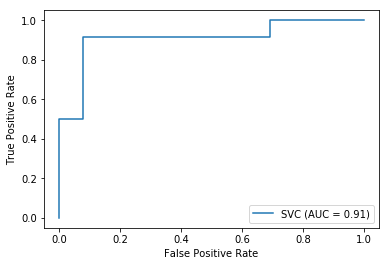

In [66]:
metrics.plot_roc_curve(clf, X_test, y_test)


### AUC
Area Under the curve. The higher the AUC of a model the better. It means Higher true positive compared to the False positive rate. 



In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_y)

0.8782051282051283